# ALL LECTURES, EXERCISES AND KEY ASPECTS

Typical color matrix: [G B; R G]
Why? Because human eye is more sensitive to green light. Moreover, gray images give you more details.
Hue: color, Saturation: purity, amount of white, Intensity: brightness.

## Filtering
We use filtering to extract certain informations from the image (edges, contours, ...) or to enhance it (remove noise, sharpen, ...).

### Linear

- Mean filtering - replacing pixel with the average of the neighbors, it will blur the image and reduce noise, but it can blur edges and details. Can be affected by outliers. Faster than meadian filtering.

- Median filtering - replacing pixel with the median of the neighbors, it's very good at removing salt and pepper noise, while preserving details and edges better than the mean filter. Is not affected by outlieres. Slower, because of the sorting process.

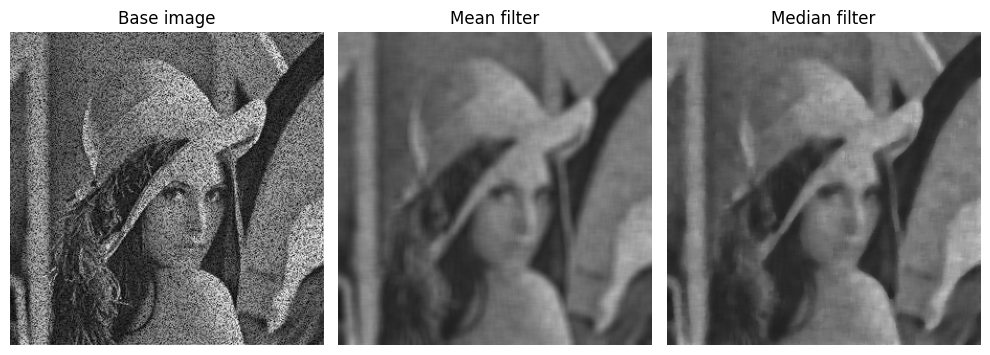

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

size = 9

img = cv.imread("picture1.jpg")
img_mean = cv.blur(img, (size,size))
img_median = cv.medianBlur(img, size)

fig, axes = plt.subplots(1, 3, figsize=(10, 5)) 


axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('Base image')

axes[1].imshow(img_mean)
axes[1].axis('off')
axes[1].set_title('Mean filter')

axes[2].imshow(img_median)
axes[2].axis('off')
axes[2].set_title('Median filter')

plt.tight_layout()
plt.show()



### NON LINEAR
- Thresholding - pixels are converted to either black or white depending on whether they are below or above threshold
- Adaptive thresholding - instead of single threshold level, adaptive thresholding calculates the threshold for smaller regions of the image. Each pixel gets its own threshold depending on the surroundings. Adaptive thresholding could be mean or gaussian. For mean the threshold for each pixel is calculated as the mean of the pixel values in a small neighborhood. Gaussian instead of using the mean, a weighted sum (Gaussian) of the pixel values in the neighborhood is used to compute the threshold. Gaussian generally preserves edges and details better in a noisy image.
- Otsu thresholding - automatically calculates threshold for an image, its like normal thresholding but automatic.


### IMPORTANT
- Add cmap = 'gray' while displaying, because imshow by default is trying to display images that have 3 channels and after we give it image with 1 channel it doesn't handle it well.

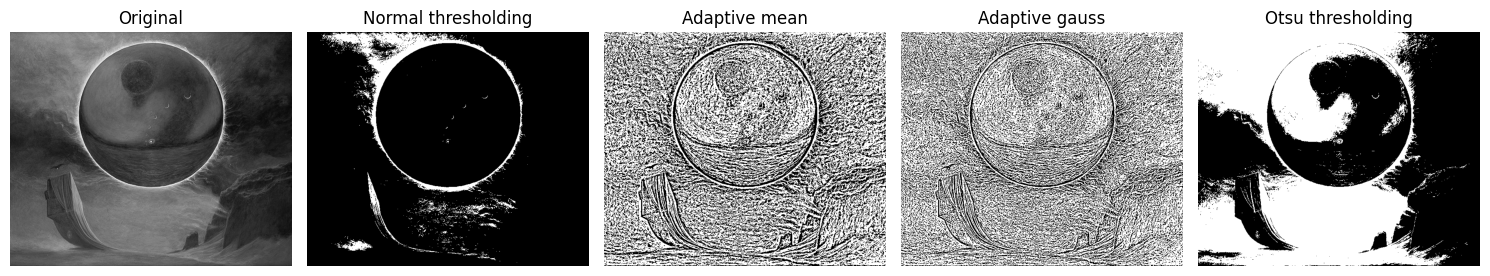

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("beksinski.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, img_thresh = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)
img_adaptive_mean = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
img_adaptive_gauss = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
_, img_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


fig, axes = plt.subplots(1, 5, figsize=(15, 10)) 

axes[0].imshow(img_gray, cmap = 'gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(img_thresh, cmap = 'gray')
axes[1].axis('off')
axes[1].set_title('Normal thresholding')

axes[2].imshow(img_adaptive_mean, cmap = 'gray')
axes[2].axis('off')
axes[2].set_title('Adaptive mean')

axes[3].imshow(img_adaptive_gauss, cmap = 'gray')
axes[3].axis('off')
axes[3].set_title('Adaptive gauss')

axes[4].imshow(img_otsu, cmap = 'gray')
axes[4].axis('off')
axes[4].set_title('Otsu thresholding')

plt.tight_layout()
plt.show()

## MORPHOLOGICAL OPERATIONS
| **Operation** | **Effect**                                 | **Primary Purpose**               | **Order of Operations**     | **Common Use Cases**                              |
|---------------|--------------------------------------------|-----------------------------------|-----------------------------|---------------------------------------------------|
| **Erosion**   | Shrinks objects, removes boundaries        | Removes small objects/noise       | Erosion                      | Noise removal, boundary smoothing                 |
| **Dilation**  | Expands objects, fills holes/gaps          | Connects disjoint objects, fills gaps | Dilation                   | Filling gaps, connecting nearby features          |
| **Opening**   | Removes noise, smooths boundaries          | Removes small objects or noise    | Erosion → Dilation           | Noise reduction while keeping main objects intact |
| **Closing**   | Fills small holes/gaps, smooths contours   | Closes gaps, fills holes in objects | Dilation → Erosion         | Filling holes in objects, connecting nearby objects|


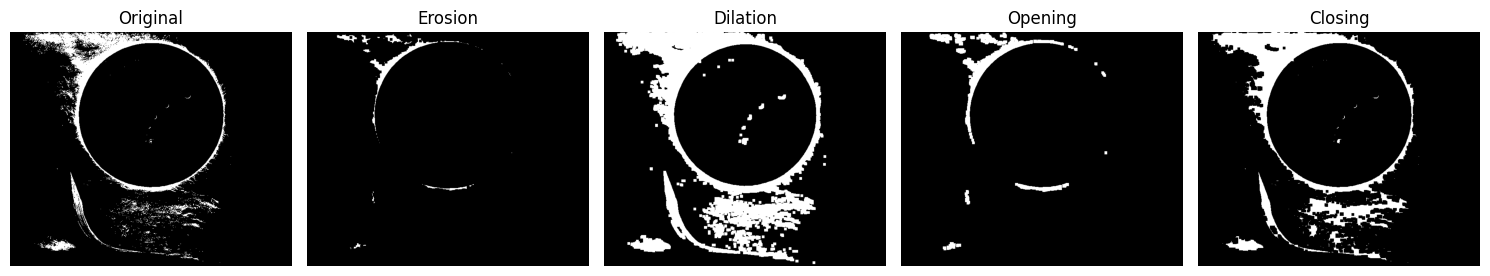

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("beksinski.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, img_thresh = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((7,7), np.uint8)

erosion = cv.erode(img_thresh, kernel)
dilation = cv.dilate(img_thresh, kernel)
opening = cv.morphologyEx(img_thresh, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img_thresh, cv.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 5, figsize=(15, 10)) 

axes[0].imshow(img_thresh, cmap = 'gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(erosion, cmap = 'gray')
axes[1].axis('off')
axes[1].set_title('Erosion')

axes[2].imshow(dilation, cmap = 'gray')
axes[2].axis('off')
axes[2].set_title('Dilation')

axes[3].imshow(opening, cmap = 'gray')
axes[3].axis('off')
axes[3].set_title('Opening')

axes[4].imshow(closing, cmap = 'gray')
axes[4].axis('off')
axes[4].set_title('Closing')

plt.tight_layout()
plt.show()